In [1]:
#Importing Dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#metrics and visualising
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

#classifiers
from xgboost import XGBClassifier
import lightgbm as lgb

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
train_data=pd.read_csv("../input/train.csv")

train_data.head()

In [ ]:
train_data.describe()

In [ ]:
train_data["target"].hist()    #data imbalance

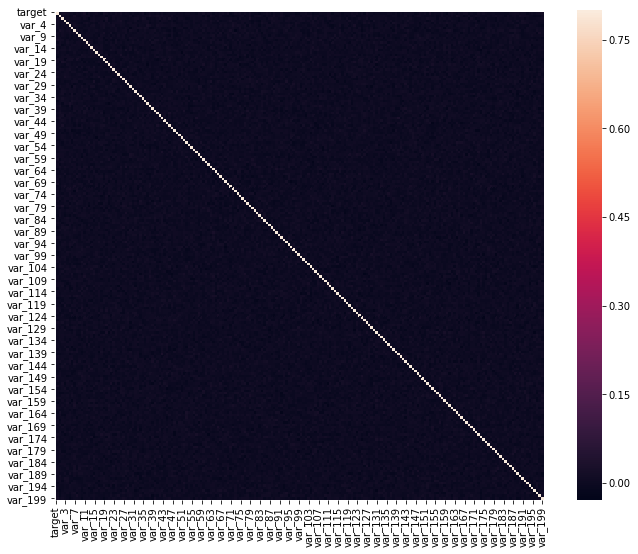

In [7]:
# Correlation matrix
corrmat = train_data[train_data["target"]==1].corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()      #most of the variables are either -ve co-related or are independent

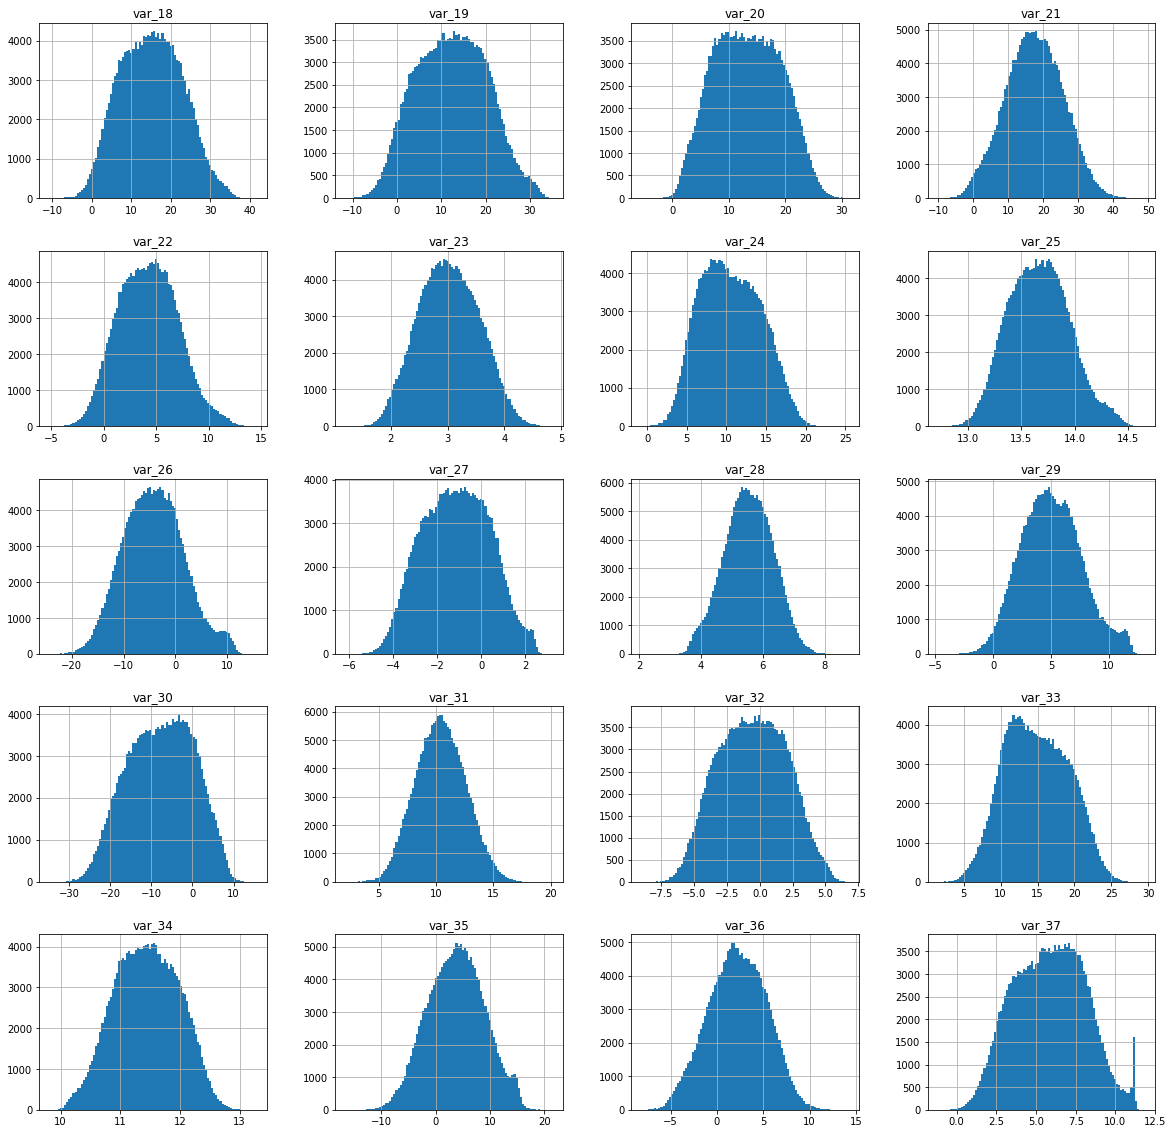

In [8]:
show=train_data[train_data["target"]==0].iloc[:,20:40].hist(figsize=(20,20),bins=100)#most of them shows normal distribution

In [9]:
pca=PCA()
data_2x=pca.fit_transform(train_data.iloc[:,2:])

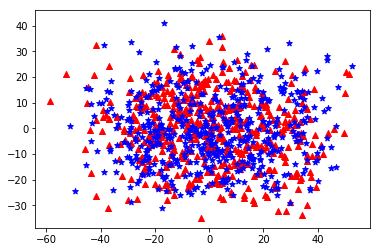

In [10]:
plt.scatter(data_2x[train_data["target"]==1][:500,0],data_2x[train_data["target"]==1][:500,1],c="r",marker="^")
plt.scatter(data_2x[train_data["target"]==0][:500,0],data_2x[train_data["target"]==0][:500,1],c="b",marker="*")
plt.show()

#can not apply anamoly detection using normal distribution

In [11]:
#applying different models

In [12]:
data=train_data.iloc[:,2:]
target=train_data.iloc[:,1]

data_x,test_x,data_y,test_y=train_test_split(data,target,test_size=0.25,random_state=2)

In [21]:
#using eXtra Gradient Boosting
xgb=XGBClassifier(max_depth=6,learning_rate=0.2)

In [22]:
xgb.fit(data_x,data_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [23]:
xgb.score(test_x,test_y)

0.91058

In [25]:
pred=xgb.predict(test_x)

In [26]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     44866
           1       0.77      0.19      0.30      5134

   micro avg       0.91      0.91      0.91     50000
   macro avg       0.84      0.59      0.63     50000
weighted avg       0.90      0.91      0.89     50000



In [52]:
#Using Light Gradient Boosting


d_train = lgb.Dataset(data_x,data_y)
params = {}
params['learning_rate'] = 0.3
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 15
params['min_data'] = 1
params['max_depth'] = 15
clf = lgb.train(params, d_train, 200)

In [53]:
#Prediction
y_pred=clf.predict(test_x)
print(y_pred.shape[0])
#convert into binary values
for i in range(0,y_pred.shape[0]):
    if y_pred[i]>=0.5:       # setting threshold to .5
        y_pred[i]=1
    else:
        y_pred[i]=0

50000


In [54]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     44866
           1       0.66      0.32      0.43      5134

   micro avg       0.91      0.91      0.91     50000
   macro avg       0.79      0.65      0.69     50000
weighted avg       0.90      0.91      0.90     50000



# further Steps
### 1. balance the data using clustering of abundant class using kMeans/KMedioids and       applying diff algos like SVM or NN.
### 2. Feature engineering adding (skewness,kurtosis,min ,max,mean etc)
### 3. generating pseudo data for the minor class from the given data.